    1. Haz un analisis exploratorio de los datos que permita:
        Analizar las ventas y la actividad de los clientes
        Evaluar el impacto de la promoción
    2. Realiza un modelo predictivo que permita conocer el tipo de segmento al  que pertenece cada cliente en función de las siguientes variables predictoras: (Se ha de predecir la variable (CLIENT_SEGMENT)).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer


In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score



In [ ]:
#Data Load
ruta_1 = ("/content/mwc22-client_table.csv")
ruta_2 = ("/content/mwc22-orders_table.csv")

In [ ]:
#DataFrames formation
df_1 = pd.read_csv(ruta_1)
df_2 = pd.read_csv(ruta_2)

In [ ]:
df_1.head()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,"67,25","201,75",0
1,24321859,2,"58,33",350,0
2,24321880,3,"46,67",112,0
3,24321957,2,50,600,0
4,24321962,4,10,120,0


In [ ]:
print(df_1.size)
print(df_1.shape)

179420
(35884, 5)


In [ ]:
df_2.head()

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery


In [ ]:
print(df_2.size)
print(df_2.shape)

267648
(66912, 4)


In [ ]:
#Concatenation of the two DataFrames
df = pd.concat([df_1, df_2], axis=0)

In [ ]:
df.tail()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION,NB PRODS,ORDER ID,FRUIT_PRODUCT
66907,48352045,NaN,NaN,NaN,NaN,2.0,670065547.0,Pineapple
66908,48352045,NaN,NaN,NaN,NaN,1.0,670065547.0,Apple
66909,48352045,NaN,NaN,NaN,NaN,2.0,670065547.0,Watermelon
66910,48352045,NaN,NaN,NaN,NaN,1.0,670065547.0,Grape
66911,48352045,NaN,NaN,NaN,NaN,1.0,670065547.0,Plum


In [ ]:
print(df.size)
print(df.shape)

822368
(102796, 8)


In [ ]:
#Checking out DataFrame columns
df.columns

Index(['CLIENT ID', 'CLIENT_SEGMENT', 'AVG CONSO', 'AVG BASKET SIZE',
       'RECEIVED_COMMUNICATION', 'NB PRODS', 'ORDER ID', 'FRUIT_PRODUCT'],
      dtype='object')

In [ ]:
#The DataFrame has 3 object variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102796 entries, 0 to 66911
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CLIENT ID               102796 non-null  int64  
 1   CLIENT_SEGMENT          35884 non-null   float64
 2   AVG CONSO               35884 non-null   object 
 3   AVG BASKET SIZE         35884 non-null   object 
 4   RECEIVED_COMMUNICATION  35884 non-null   float64
 5   NB PRODS                66912 non-null   float64
 6   ORDER ID                66912 non-null   float64
 7   FRUIT_PRODUCT           66912 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 7.1+ MB


In [ ]:
#Renaming DataFrame columns to avoid spaces in the column labels.
df.rename(columns={"CLIENT ID": "CLIENT_ID","AVG CONSO": "AVG_CONSO", "AVG BASKET SIZE": "AVG_BASKET_SIZE","NB PRODS": "NB_PRODS","ORDER ID": "ORDER_ID"},inplace=True)

In [ ]:
df.tail()

,CLIENT_ID,CLIENT_SEGMENT,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION,NB_PRODS,ORDER_ID,FRUIT_PRODUCT
66907,48352045,None,None,None,None,None,670065547.0,None
66908,48352045,None,None,None,None,None,670065547.0,None
66909,48352045,None,None,None,None,None,670065547.0,None
66910,48352045,None,None,None,None,None,670065547.0,None
66911,48352045,None,None,None,None,None,670065547.0,None


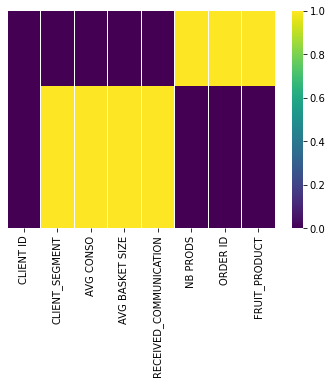

In [ ]:
#Checking number of missing values in DataFrame
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")  

Missing values imputation

In [ ]:
#Counting the number of missing values in each column
print(df.isnull().sum())

CLIENT_ID                     0
CLIENT_SEGMENT            66912
AVG_CONSO                 66912
AVG_BASKET_SIZE           66912
RECEIVED_COMMUNICATION    66912
NB_PRODS                  35884
ORDER_ID                  35884
FRUIT_PRODUCT             35884
dtype: int64


KKN imputation

In [ ]:
#Nan imputation using KKN
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [ ]:
Transforming Nans into real values
df_filled = imputer.fit_transform (df[['NB_PRODS','ORDER_ID','FRUIT_PRODUCT','CLIENT_SEGMENT','RECEIVED_COMMUNICATION']])

In [ ]:
df.tail()

,CLIENT_ID,CLIENT_SEGMENT,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION,NB_PRODS,ORDER_ID,FRUIT_PRODUCT
66907,48352045,6,1494,3974,2,2,670065547.0,19
66908,48352045,6,1494,3974,2,1,670065547.0,0
66909,48352045,6,1494,3974,2,2,670065547.0,23
66910,48352045,6,1494,3974,2,1,670065547.0,7
66911,48352045,6,1494,3974,2,1,670065547.0,20


In [ ]:
#Missimg values inputation comprobation
print(df.FRUIT_PRODUCT.isnull().sum())
print(df.NB_PRODS.isnull().sum())
print(df.ORDER_ID.isnull().sum())
print(df.CLIENT_SEGMENT.isnull().sum())
print(df.RECEIVED_COMMUNICATION.isnull().sum())

0
0
35884
0
0


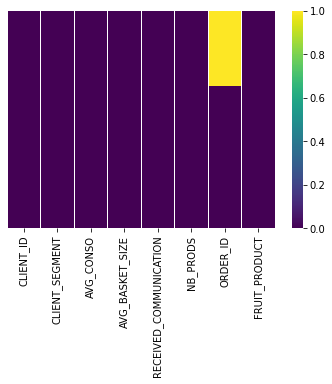

In [ ]:
#Visual missing values comprobation
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")  

Outliers study

In [ ]:
df.NB_PRODS.unique()

array([  0,   5,  10,  15,   3,   9,   2,   4,   6,   1,   7,   8,  20,
        30,  18,  40, -40,  11,  12,  14,  -5,  16,  60,  21,  70,  13,
        19,  27,  24,  25,  22,  -2,  35,  17,  50, -20,  43,  -6,  26,
        38,  36,  39,  28,  80,  44, -10,  -3,  -1,  29,  32,  23,  -7,
        -4,  -8,  75,  31, 100, -30, 198, -15,  54,  90,  45,  34,  65,
        58,  48,  41, 120, 180, -12, -11,  42,  -9, -16,  37,  57,  33,
        92,  49, 102, -35, -80])

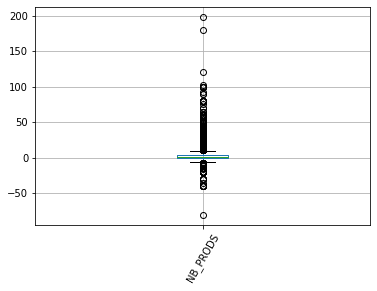

In [ ]:
#La única variable numérica tiene outliers
df.boxplot(column =['NB_PRODS'],rot=60,fontsize=10)

In [ ]:
#IQR calculation and creation of upper and lower outliers limits
Q3 = np.quantile(df.NB_PRODS, 0.75)
Q1 = np.quantile(df.NB_PRODS, 0.25)
IQR = Q3 - Q1

lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR

In [ ]:
def outliers(df,ft):
  Q1 = np.quantile(df[ft], 0.25)
  Q3 = np.quantile(df[ft], 0.75)
  IQR = Q3 - Q1

  lower_range = Q1 - 1.5 * IQR
  upper_range = Q3 + 1.5 * IQR

  ls = df.index[df[ft] < lower_range | (df[ft] > upper_range )]

  return ls

Study of features

In [ ]:
print(df.CLIENT_SEGMENT.dtype)
print(df.NB_PRODS.dtype)

[ 6.  2.  3.  4.  5.  1. nan]
float64
float64


In [ ]:
#Converting to object features
df['CLIENT_SEGMENT'] = df['CLIENT_SEGMENT'].astype(object)
df['ORDER_ID'] = df['ORDER_ID'].astype(object)
df['RECEIVED_COMMUNICATION'] = df['RECEIVED_COMMUNICATION'].astype(object)
df['CLIENT_ID'] = df['CLIENT_ID'].astype(object)
df['NB_PRODS'] = df['NB_PRODS'].astype(int)

In [ ]:
#Filling nans with zeros to convert afterwards from loat to int. 
df['NB_PRODS'] = df['NB_PRODS'].fillna(0)

In [ ]:
#Checking change to object type
print(df.CLIENT_SEGMENT.dtype)
print(df.ORDER_ID.dtype)
print(df.RECEIVED_COMMUNICATION.dtype)
print(df.CLIENT_ID.dtype)
print(df.NB_PRODS.dtype)

object
object
object
object
float64


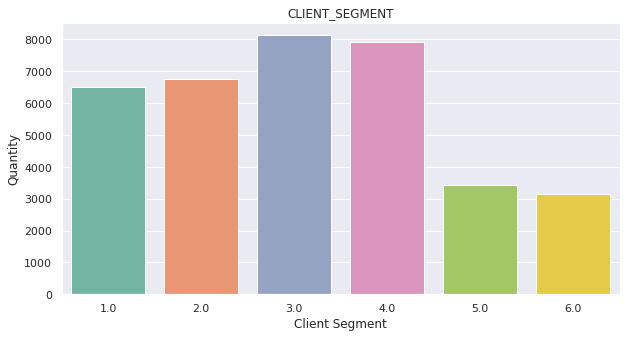

In [ ]:
#Visual representation of the target feature
plt.figure(figsize=(10,5))  
sns.set(style = "darkgrid")
ax = sns.countplot (x ="CLIENT_SEGMENT" , data = df, palette = "Set2")
plt.title("CLIENT_SEGMENT")
plt.xlabel('Client Segment')
plt.ylabel('Quantity')
plt.show()

In [ ]:
print(df.RECEIVED_COMMUNICATION.unique())
print(df.RECEIVED_COMMUNICATION.dtype)

[0.0 1.0 nan]
object


In [ ]:
#Label Encoder of object features(FRUIT PRODUCT,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION and CLIENT SEGMENT. 
number = LabelEncoder()
df['FRUIT_PRODUCT'] = number.fit_transform(df['FRUIT_PRODUCT'].astype(str))
number_2 = LabelEncoder()
df['AVG_BASKET_SIZE'] = number_2.fit_transform(df['AVG_BASKET_SIZE'].astype(str))
number_3 = LabelEncoder()
df['AVG_CONSO'] = number_3.fit_transform(df['AVG_CONSO'])
df['RECEIVED_COMMUNICATION'] = number_3.fit_transform(df['RECEIVED_COMMUNICATION'])
df['CLIENT_SEGMENT'] = number_3.fit_transform(df['CLIENT_SEGMENT'])

In [ ]:
df.FRUIT_PRODUCT.unique()

array([nan, 'Apple', 'Orange', 'Kiwi', 'Pear', 'Cheery', 'Watermelon',
       'Strawberry', 'Nectarine', 'Grape', 'Mango', 'Blueberry',
       'Pomegranate', 'Nuwe Fruit', 'Devil Fruit', 'Plum', 'Papaya',
       'Jackfruit', 'Pineapple', 'Lemon', 'Lime', 'Apricot', 'Coconut',
       'Melon', 'Banana'], dtype=object)

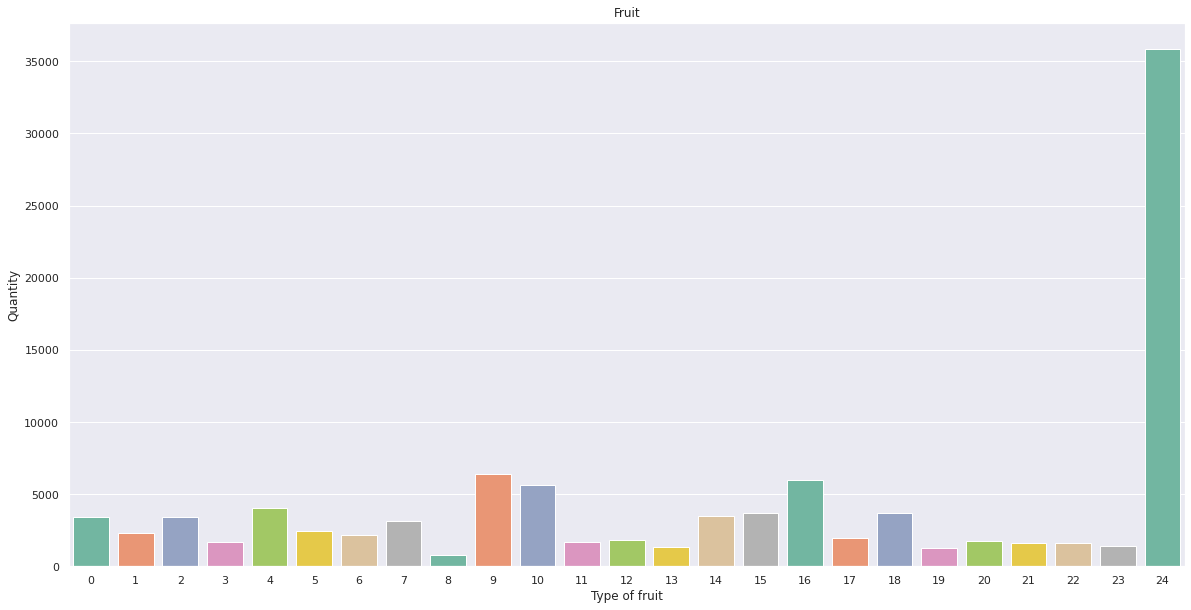

In [ ]:
#Visual Representation of the feature Fruit Product
plt.figure(figsize=(20,10))  
sns.set(style = "darkgrid")
ax = sns.countplot (x ="FRUIT_PRODUCT" , data = df, palette = "Set2")
plt.title("Fruit")
plt.xlabel('Type of fruit')
plt.ylabel('Quantity')
plt.show()

In [ ]:
print("Clases: ", df['FRUIT_PRODUCT'].unique())
for c in df['FRUIT_PRODUCT'].unique():
    print(f"El porcentaje de fruta de tipo {c} es {(sum(df['FRUIT_PRODUCT']==c) / df.shape[0]):.2f}")

Clases:  [nan 'Apple' 'Orange' 'Kiwi' 'Pear' 'Cheery' 'Watermelon' 'Strawberry'
 'Nectarine' 'Grape' 'Mango' 'Blueberry' 'Pomegranate' 'Nuwe Fruit'
 'Devil Fruit' 'Plum' 'Papaya' 'Jackfruit' 'Pineapple' 'Lemon' 'Lime'
 'Apricot' 'Coconut' 'Melon' 'Banana']
El porcentaje de fruta de tipo nan es 0.00
El porcentaje de fruta de tipo Apple es 0.03
El porcentaje de fruta de tipo Orange es 0.06
El porcentaje de fruta de tipo Kiwi es 0.06
El porcentaje de fruta de tipo Pear es 0.04
El porcentaje de fruta de tipo Cheery es 0.04
El porcentaje de fruta de tipo Watermelon es 0.01
El porcentaje de fruta de tipo Strawberry es 0.02
El porcentaje de fruta de tipo Nectarine es 0.03
El porcentaje de fruta de tipo Grape es 0.03
El porcentaje de fruta de tipo Mango es 0.02
El porcentaje de fruta de tipo Blueberry es 0.02
El porcentaje de fruta de tipo Pomegranate es 0.02
El porcentaje de fruta de tipo Nuwe Fruit es 0.04
El porcentaje de fruta de tipo Devil Fruit es 0.02
El porcentaje de fruta de tipo Plum

In [ ]:
#Saving the data after EDA in pickle format.
df.to_pickle("/content/MWC_2022_EDA.pkl") 


Supervised classification

In [ ]:
X = df.drop(['CLIENT_ID','ORDER_ID','CLIENT_SEGMENT'], axis= 1)
y = df['CLIENT_SEGMENT']

In [ ]:
#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)

In [ ]:
#AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
clf.score(X_test,y_test)*100

74.82976653696498

In [ ]:
#Random Forest for multiclass classifiction
model_rf = RandomForestClassifier(class_weight='balanced',random_state=1,max_depth=5,n_estimators=10,max_features=1)

In [ ]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, max_features=1,
                       n_estimators=10, random_state=1)

In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred)*100)

85.99708171206227


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.67      0.61      1259
           1       0.65      0.69      0.67      1340
           2       0.75      0.64      0.69      1612
           3       0.62      0.58      0.60      1574
           4       0.42      0.65      0.51       672
           5       0.21      0.08      0.11       611
           6       1.00      1.00      1.00     13492

    accuracy                           0.86     20560
   macro avg       0.60      0.61      0.60     20560
weighted avg       0.86      0.86      0.86     20560



In [ ]:
#Grid Search CV - Random Forest (time it . 15 minutes)
regr = RandomForestClassifier(class_weight='balanced')
# Find the best parameters for the model
parameters = {
    'max_depth': [70, 80, 90, 100],
    'n_estimators': [900, 1000, 1100]
}
gridforest = GridSearchCV(regr, parameters, cv = 3, n_jobs = -1, verbose = 1)
gridforest.fit(X_train, y_train)
gridforest.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


{'max_depth': 80, 'n_estimators': 900}

In [ ]:
#Random Forest for multiclass classifiction (Grid Search CV parameters)
model_RF = RandomForestClassifier(class_weight='balanced',random_state=1,max_depth=80,n_estimators=900,max_features=1)

In [ ]:
model_RF.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=80, max_features=1,
                       n_estimators=900, random_state=1)

In [ ]:
print(model_RF.score(X_test,y_test)*100)

90.75389105058366


In [ ]:
predicted_RF = model_RF.predict(X_test)

In [ ]:
print(classification_report(y_test,predicted_RF))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1259
           1       0.81      0.85      0.83      1340
           2       0.78      0.73      0.75      1612
           3       0.73      0.67      0.70      1574
           4       0.63      0.94      0.75       672
           5       0.17      0.11      0.13       611
           6       1.00      1.00      1.00     13492

    accuracy                           0.91     20560
   macro avg       0.71      0.74      0.72     20560
weighted avg       0.90      0.91      0.90     20560



In [ ]:
#Save model in pickle format
pickle.dump(model_RF, open('model.pkl', 'wb'))

Estimation

In [ ]:
ruta_3 = ("/content/mwc22-client_table+-+test_x.csv")

In [ ]:
df_es = pd.read_csv(ruta_3)

In [ ]:
df_es.head()

,CLIENT_ID,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION
0,48352078,"8,33",100,0
1,18072186,"93,42","186,83",1
2,48352246,"45,83","137,5",0
3,18070621,"16,67",200,1
4,48352262,"13,33",160,0


In [ ]:
#Renaming column labels to avoid spaces.
df_es.rename(columns={"CLIENT ID": "CLIENT_ID","AVG CONSO": "AVG_CONSO", "AVG BASKET SIZE": "AVG_BASKET_SIZE"},inplace=True)

In [ ]:
df_es.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLIENT ID               19 non-null     int64 
 1   AVG CONSO               19 non-null     object
 2   AVG BASKET SIZE         19 non-null     object
 3   RECEIVED_COMMUNICATION  19 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 736.0+ bytes


In [ ]:
#Label encoder of object features AVG_CONSO and AVG_BASKET_SIZE
numer = LabelEncoder()
df_es['RECEIVED_COMMUNICATION'] = number.fit_transform(df_es['RECEIVED_COMMUNICATION'].astype(object))
df_es['AVG_CONSO'] = number.fit_transform(df_es['AVG_CONSO'])
df_es['AVG_BASKET_SIZE'] = number.fit_transform(df_es['AVG_BASKET_SIZE'])

In [ ]:
df_es.head()

,CLIENT_ID,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION
0,48352078,14,0,0
1,18072186,16,8,1
2,48352246,11,4,0
3,18070621,5,9,1
4,48352262,1,6,0


In [ ]:
print(df_es.size)
print(df_es.shape)

95
(19, 5)


In [ ]:
#Creation of a column name Fruit Product with values from 0 to 24
df_es["FRUIT_PRODUCT"] = np.random.randint(0,24, len(df_es))

In [ ]:
df_es.head()

,CLIENT_ID,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION,FRUIT_PRODUCT
0,48352078,14,0,0,22
1,18072186,16,8,1,4
2,48352246,11,4,0,11
3,18070621,5,9,1,15
4,48352262,1,6,0,10


In [ ]:
df_es.AVG_BASKET_SIZE.unique()

array(['100', '186,83', '137,5', '200', '160', '162,5', '106,67',
       '333,33', '290', '230,83', '343,67', '45', '109,29', '400', '150',
       '211,22', '133'], dtype=object)

In [ ]:
df_es.AVG_CONSO.unique()

array(['8,33', '93,42', '45,83', '16,67', '13,33', '54,17', '26,67',
       '166,67', '145', '230,83', '85,92', '7,5', '154,83', '33,33', '25',
       '158,42', '110,83'], dtype=object)

In [ ]:
df.FRUIT_PRODUCT.unique()

array([24,  0, 16,  9, 18,  4, 23, 22, 14,  7, 12,  3, 21, 15,  6, 20, 17,
        8, 19, 10, 11,  1,  5, 13,  2])

In [ ]:
df.FRUIT_PRODUCT.max()

24

In [ ]:
df.FRUIT_PRODUCT.min()

0

In [ ]:
df.head()

,CLIENT_ID,CLIENT_SEGMENT,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION,NB_PRODS,ORDER_ID,FRUIT_PRODUCT
0,24321771,5,1245,1506,0,0,NaN,24
1,24321859,1,1172,2648,0,0,NaN,24
2,24321880,2,1067,204,0,0,NaN,24
3,24321957,1,1104,3340,0,0,NaN,24
4,24321962,3,2,327,0,0,NaN,24


In [ ]:
df.NB_PRODS.unique()

array([  0,   5,  10,  15,   3,   9,   2,   4,   6,   1,   7,   8,  20,
        30,  18,  40, -40,  11,  12,  14,  -5,  16,  60,  21,  70,  13,
        19,  27,  24,  25,  22,  -2,  35,  17,  50, -20,  43,  -6,  26,
        38,  36,  39,  28,  80,  44, -10,  -3,  -1,  29,  32,  23,  -7,
        -4,  -8,  75,  31, 100, -30, 198, -15,  54,  90,  45,  34,  65,
        58,  48,  41, 120, 180, -12, -11,  42,  -9, -16,  37,  57,  33,
        92,  49, 102, -35, -80])

In [ ]:
df.NB_PRODS.max()

198

In [ ]:
df.NB_PRODS.min()

-80

In [ ]:
#Creation of a column name Fruit Product with values from -80 to 198
df_es["NB_PRODS"] = np.random.randint(-80,198, len(df_es))

In [ ]:
df_es.head()

,CLIENT_ID,AVG_CONSO,AVG_BASKET_SIZE,RECEIVED_COMMUNICATION,FRUIT_PRODUCT,NB_PRODS
0,48352078,14,0,0,22,106
1,18072186,16,8,1,4,99
2,48352246,11,4,0,11,-7
3,18070621,5,9,1,15,-1
4,48352262,1,6,0,10,62


In [ ]:
X_test_Es =df_es.drop(['CLIENT_ID'],axis=1)

In [ ]:
predicted_rf_Es = model_RF.predict(X_test_Es)
predicted_rf_Es

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0, 0, 6, 6, 4, 4, 6, 0, 6, 6, 6, 6, 0, 0, 4, 0, 6, 3, 6])

In [ ]:
#Save prediction in csv format.
pd.DataFrame(predicted_rf_Es).to_csv("/content/prediccion.csv")